In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

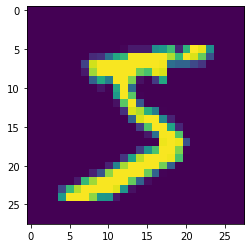

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

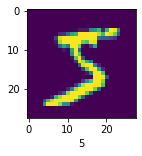

In [ ]:
plot_sample(X_train,y_train,0)

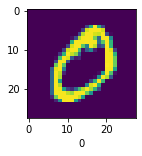

In [ ]:
plot_sample(X_train,y_train,1)

In [ ]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")

])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1353 - accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0459 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0087 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9891


[0.04343533143401146, 0.9890999794006348]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.2062770e-14, 1.4973960e-13, 3.0990486e-09, 6.2973932e-11,
        5.8998625e-11, 3.9029028e-16, 7.2147244e-22, 1.0000000e+00,
        4.2919878e-13, 1.4761515e-08],
       [3.5962004e-09, 2.2268550e-08, 1.0000000e+00, 3.3296101e-13,
        2.0309163e-14, 3.2404816e-19, 9.5081901e-11, 5.3229421e-14,
        1.2224713e-11, 2.9332063e-14],
       [1.4936460e-10, 9.9998391e-01, 2.1681055e-09, 1.2720587e-10,
        1.2549575e-05, 1.5841381e-07, 4.0329251e-08, 3.0781787e-06,
        1.6699917e-07, 6.9262519e-08],
       [1.0000000e+00, 3.9100936e-12, 6.9952609e-14, 1.9225662e-13,
        1.5306130e-12, 7.9001655e-10, 1.9879444e-08, 3.4341464e-15,
        4.8572950e-09, 1.8639751e-11],
       [1.5479061e-13, 1.3172155e-10, 8.8071555e-12, 1.5272207e-15,
        9.9999917e-01, 1.6122456e-11, 1.1253979e-11, 2.6844300e-14,
        3.9740731e-13, 8.7030099e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(x) for x in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [ ]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(69.0, 0.5, 'Truth')

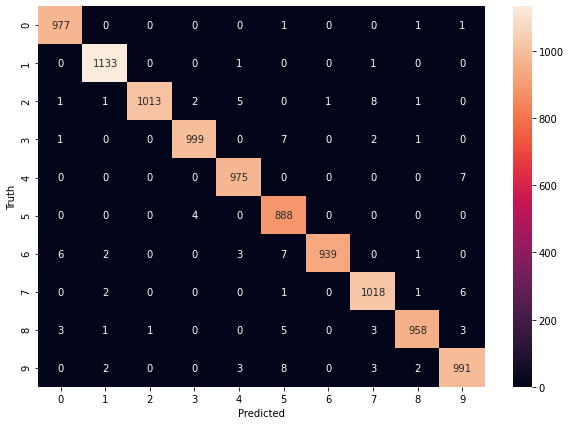

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_classes),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")